# Handwritten Digit Recognition with MINST dataset

Approach : To build a feed forward network with MINST dataset using pytorch

In [0]:
# installing the necessary packages
import torch
import torchvision
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# loading the dataset
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset=datasets.MNIST('~/.pytorch/MNIST_data/',train=False,transform=transform,download=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True,num_workers=0)

In [3]:
# Exploring the data
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


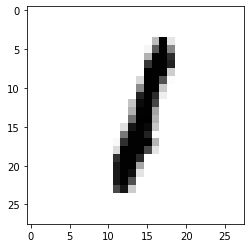

In [4]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

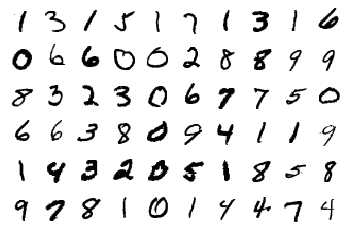

In [5]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

Building the model

In [6]:
# Framing the model
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

criterion = nn.NLLLoss()


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


### optimizing the model with SGD optimizer and updating the weights with back propragation

In [0]:
# defining the optimizer
from torch import optim
optimizer=optim.SGD(model.parameters(),lr=0.003,momentum=0.9)

In [8]:
epochs = 6
train_losses = []
test_losses = []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output=model.forward(images)
        # TODO: Training pass
        
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    else:

      test_loss=0
      accuracy=0
      with torch.no_grad():
          model.eval()
          for images,labels in testloader:
              images= images.view(images.shape[0],-1)
              log_ps=model.forward(images)
              test_loss+=criterion(log_ps,labels)
              ps=torch.exp(log_ps)
              top_p,top_class=ps.topk(1,dim=1)
              equals=top_class==labels.view(*top_class.shape)
              accuracy+=torch.mean(equals.type(torch.FloatTensor))
      model.train()
      train_losses.append(running_loss/len(trainloader))
      test_losses.append(test_loss/len(testloader))

      print("Epoch: {}/{}.. ".format(e+1, epochs),
            "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
            "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
            "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))   


Epoch: 1/6..  Training Loss: 0.641..  Test Loss: 0.301..  Test Accuracy: 0.911
Epoch: 2/6..  Training Loss: 0.279..  Test Loss: 0.245..  Test Accuracy: 0.927
Epoch: 3/6..  Training Loss: 0.217..  Test Loss: 0.194..  Test Accuracy: 0.942
Epoch: 4/6..  Training Loss: 0.175..  Test Loss: 0.155..  Test Accuracy: 0.954
Epoch: 5/6..  Training Loss: 0.147..  Test Loss: 0.133..  Test Accuracy: 0.958
Epoch: 6/6..  Training Loss: 0.127..  Test Loss: 0.121..  Test Accuracy: 0.962


### plotting the training error and validation error

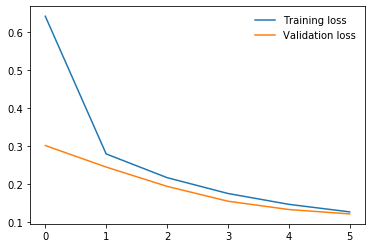

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)